In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import shapely as shy
import osmnx as ox

pd.options.display.max_rows = 4
%matplotlib inline
import os
os.environ["PROJ_LIB"] = "C:\ProgramData\Anaconda3\Library\share" #window

In [2]:
#Filepaths
work = r"D:"
laptop = r"C:\Users\jerem"
origin = work

In [3]:
fp = r"\Box Sync\Policy Evaluation\input_data\VZV_Leading Pedestrian Interval Signals\geo_export_0c63b43f-83c0-4834-aa91-2c564c1bff2c.shp"
#fp =  r"..\input_data\leading_pedestrian_interval_signals_shapefile_2263\leading_pedestrian_interval_signals_shapefile_2263.shp"
df1 = gpd.read_file(origin+fp)

In [4]:
df1.head(3)

,cross_stre,date_insta,time_insta,lat,long,main_stree,geometry
0,Dreiser loop East,2018-08-01,00:00:00.000,40.878465,-73.828273,Co-op City Blvd,POINT (-73.82827338235253 40.87846542795222)
1,West 119 St,2018-08-08,00:00:00.000,40.803958,-73.948271,Lenox Avenue,POINT (-73.94827133431397 40.80395846158952)
2,West 120 St,2018-08-08,00:00:00.000,40.804587,-73.947812,Lenox Avenue,POINT (-73.94781210658503 40.80458679730486)


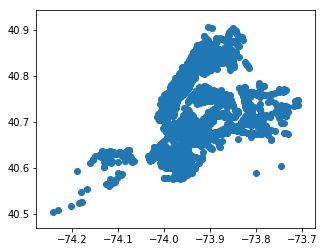

In [5]:
df1.plot()

In [6]:
df1.crs

{'init': 'epsg:4326'}

In [7]:
# Reproeject LPIS shapefile to EPSG 2263: NAD83 / New York Long Island (ftUS)
df1 = df1.to_crs({'init': 'epsg:2263'})

RuntimeError: b'No such file or directory'

In [ ]:
df1.crs

In [ ]:
type(df1)

In [ ]:
# Create ID variable
df1['LPIS_ID'] = df1.index
df1.head(3)

In [ ]:
df1.columns

In [ ]:
df1.geometry = df1['geometry'].buffer(2000)

In [ ]:
df1.plot()

In [ ]:
df1.head(3)

In [ ]:
fp =  r"\Box Sync\Policy Evaluation\input_data\notebook_output\LPIS_buffer.shp"
df1.to_file(origin+fp,driver ='ESRI Shapefile')

Tested the output in QGIS. It is exactly the same as the LPIS buffer I've created in QGIS.

Bringing in the signal traffic intersection dataframe

In [ ]:
# outdated
#fp =  r"D:\Projects\Policy Evaluation\input_data\intersection_unique_shapefile_2263\intersection_unique_shapefile_2263.shp"
#df2 = gpd.read_file(fp)

# Open signal intersection shapefile
fp = r"\Box Sync\Policy Evaluation\input_data\DOT_traffic_signals_Oct_2018\signal_controllers.shp"
df2 = gpd.read_file(origin+fp)
df2.head(3)

In [ ]:
# Create ID variable
df2['intersection_ID'] = df2.index
df2.head(3)

In [ ]:
df2['geometry_str'] = df2.geometry
df2['geometry_str'] = df2['geometry_str'].astype(str)
df2.head()

In [ ]:
# Remove duplicates
#DataFrame.drop_duplicates(subset=None, keep='first', inplace=False)
df2 = df2.drop_duplicates(subset=['geometry_str'], keep='first', inplace=False)
df2.head()

In [ ]:
df2.columns

Perform spatial join:
Intention:
Capture all intersection_id that fall within each LPIS polygon. (Something like a 1:many merge, but spatially)

In [ ]:
df2.crs = df1.crs
df1_with_df2 = gpd.sjoin(df1,df2[['intersection_ID', 'geometry']], how='inner', op='intersects')


In [ ]:
df1_with_df2.head(3)

In [ ]:
filtered_data = df1_with_df2[df1_with_df2["intersection_ID"]==1]
print(filtered_data)

saved out to check in QGIS and Stata.
Checks out. 
Now I have all intersections within each LPIS buffer.

In [ ]:
df1_with_df2.columns

In [ ]:
save_out = df1_with_df2[['LPIS_ID','intersection_ID']]

In [ ]:
save_out.head(3)

In [ ]:
type(save_out)

In [ ]:
fp =  r"\Box Sync\Policy Evaluation\working_data\intersection_2000ft_LPIS.dta"
save_out.to_stata(origin+fp)